In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/"
reviews = []
max_pages = 100  

for page in range(1, max_pages + 1):
    url = f"{base_url}{page}/"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Stopped at page {page}. No more pages found.")
        break  

    soup = BeautifulSoup(response.text, "html.parser")
    review_elements = soup.find_all("div", class_="text_content")

    if not review_elements:
        print(f"Reached the last available page at {page - 1}.")
        break  
    for review in review_elements:
        reviews.append(review.text.strip())

    print(f"Scraped page {page}")
    time.sleep(2)  

df = pd.DataFrame(reviews, columns=["Review"])
df.to_csv("british_airways_reviews2.csv", index=False)

print("scrape complete")


Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
Scraped page 11
Scraped page 12
Scraped page 13
Scraped page 14
Scraped page 15
Scraped page 16
Scraped page 17
Scraped page 18
Scraped page 19
Scraped page 20
Scraped page 21
Scraped page 22
Scraped page 23
Scraped page 24
Scraped page 25
Scraped page 26
Scraped page 27
Scraped page 28
Scraped page 29
Scraped page 30
Scraped page 31
Scraped page 32
Scraped page 33
Scraped page 34
Scraped page 35
Scraped page 36
Scraped page 37
Scraped page 38
Scraped page 39
Scraped page 40
Scraped page 41
Scraped page 42
Scraped page 43
Scraped page 44
Scraped page 45
Scraped page 46
Scraped page 47
Scraped page 48
Scraped page 49
Scraped page 50
Scraped page 51
Scraped page 52
Scraped page 53
Scraped page 54
Scraped page 55
Scraped page 56
Scraped page 57
Scraped page 58
Scraped page 59
Scraped page 60
Scraped page 61
Scraped page 62
Scraped page 63
S

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv("british_airways_reviews2.csv")
def clean_text(text):
    if isinstance(text, str):  # Check if it's a string
        text = text.lower()  # Convert to lowercase
        text = text.replace("\n", " ")  # Remove new lines
        text = "".join(char for char in text if char.isalnum() or char.isspace())  # Keep only letters & spaces
        return " ".join(text.split())  # Remove extra spaces
    return text  # Return as is if not a string

# Apply cleaning
df["Cleaned_Review"] = df["Review"].apply(clean_text)

# Save cleaned data
df.to_csv("cleaned_reviews.csv", index=False)

In [12]:


df = pd.read_csv("cleaned_reviews.csv")
df



,Review,Cleaned_Review
0,✅ Trip Verified | Flight mainly let down by ...,trip verified flight mainly let down by a disa...
1,✅ Trip Verified | Another awful experience b...,trip verified another awful experience by brit...
2,"✅ Trip Verified | The service was rude, full...",trip verified the service was rude full of att...
3,✅ Trip Verified | This flight was a joke. Th...,trip verified this flight was a joke there was...
4,✅ Trip Verified | This time British Airways ...,trip verified this time british airways manage...
...,...,...
995,✅ Trip Verified | Mahe to Stockholm via London...,trip verified mahe to stockholm via london che...
996,✅ Trip Verified | Glasgow to Tampa via Gatwic...,trip verified glasgow to tampa via gatwick ear...
997,Not Verified | Orlando to Gatwick. Travelling...,not verified orlando to gatwick travelling hom...
998,✅ Trip Verified | London to Abu Dhabi. This i...,trip verified london to abu dhabi this is the ...


In [13]:
print(df.isnull().sum())  # Check for missing values

Review            0
Cleaned_Review    0
dtype: int64


In [16]:
pip install pandas nltk


Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


nltk.download("vader_lexicon")
df = pd.read_csv("cleaned_reviews.csv")
sia = SentimentIntensityAnalyzer()


def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]  # Get sentiment score
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"


df["Sentiment"] = df["Cleaned_Review"].apply(get_sentiment)


df.to_csv("sentiment_reviews.csv", index=False)
print("✅ Sentiment analysis completed! Data saved as 'sentiment_reviews.csv'")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HELLEN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ Sentiment analysis completed! Data saved as 'sentiment_reviews.csv'


In [18]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("sentiment_reviews.csv")


df.head()


,Review,Cleaned_Review,Sentiment
0,✅ Trip Verified | Flight mainly let down by ...,trip verified flight mainly let down by a disa...,Negative
1,✅ Trip Verified | Another awful experience b...,trip verified another awful experience by brit...,Negative
2,"✅ Trip Verified | The service was rude, full...",trip verified the service was rude full of att...,Negative
3,✅ Trip Verified | This flight was a joke. Th...,trip verified this flight was a joke there was...,Neutral
4,✅ Trip Verified | This time British Airways ...,trip verified this time british airways manage...,Positive


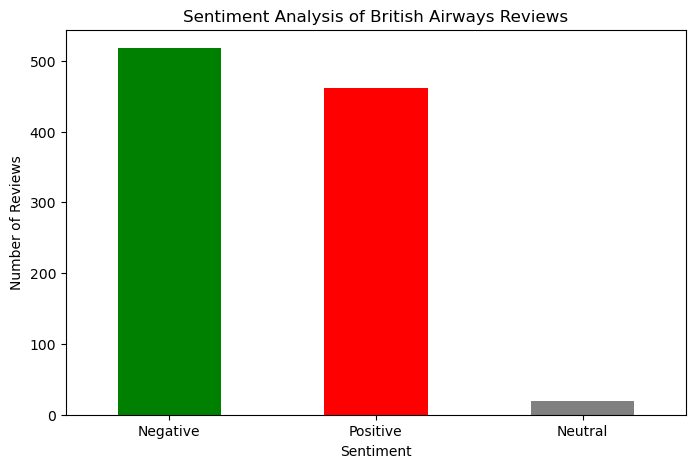

In [19]:

sentiment_counts = df["Sentiment"].value_counts()


plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])


plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Analysis of British Airways Reviews")
plt.xticks(rotation=0) 

plt.show()


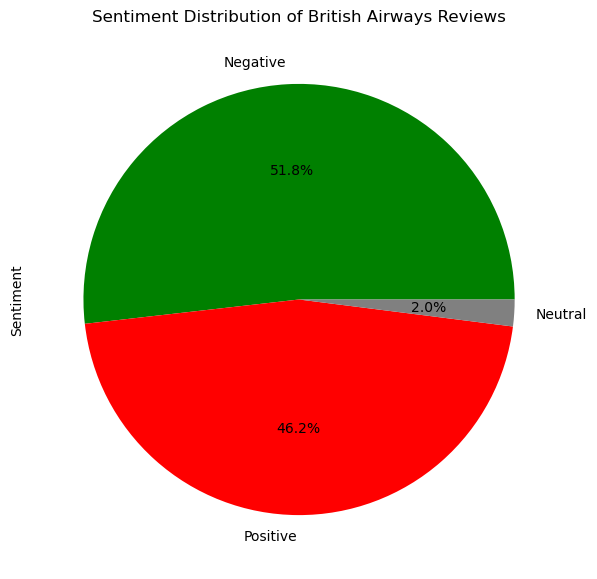

In [20]:

plt.figure(figsize=(7, 7))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=["green", "red", "gray"])


plt.title("Sentiment Distribution of British Airways Reviews")


plt.show()


In [ ]:
PIECHART

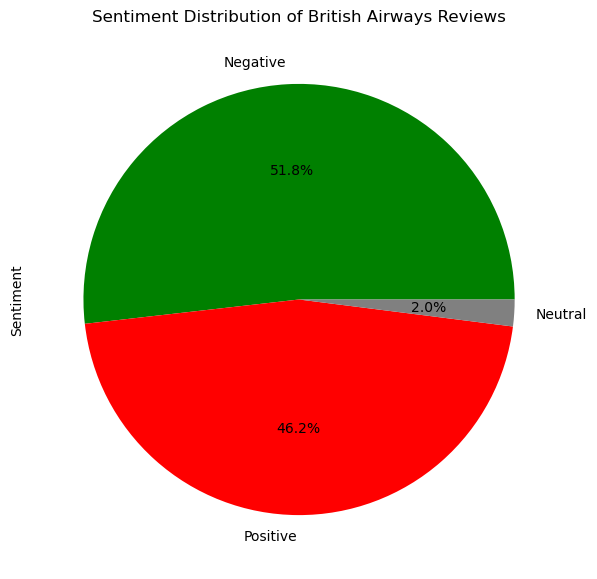

Pie chart saved successfully at: C:\Users\HELLEN\Downloads\sentiment_pie_chart.png


In [32]:
import os
import matplotlib.pyplot as plt

# Get the path to the Downloads folder
downloads_folder = os.path.join(os.path.expanduser("~"), "Downloads")
file_path = os.path.join(downloads_folder, "sentiment_pie_chart.png")

# Create a pie chart
plt.figure(figsize=(7, 7))
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", colors=["green", "red", "gray"])

# Add title
plt.title("Sentiment Distribution of British Airways Reviews")

# Save the figure
plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

print(f"Pie chart saved successfully at: {file_path}")


In [27]:
positive_reviews = df[df["Sentiment"] == "Positive"]  


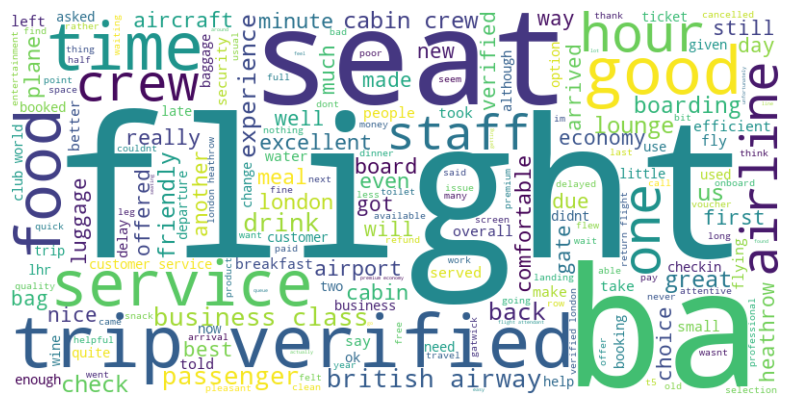

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all positive reviews into a single text
positive_text = " ".join(positive_reviews["Cleaned_Review"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [23]:
print(df["Sentiment"].value_counts())


Negative    518
Positive    462
Neutral      20
Name: Sentiment, dtype: int64


In [25]:
print(df.columns)


Index(['Review', 'Cleaned_Review', 'Sentiment'], dtype='object')


In [26]:
print(df["Sentiment"].unique())  # Check all unique sentiment values
print(df["Sentiment"].value_counts())  # Count how many positive, negative, neutral


['Negative' 'Neutral' 'Positive']
Negative    518
Positive    462
Neutral      20
Name: Sentiment, dtype: int64


In [9]:
pip install pandas numpy nltk scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


df = pd.read_csv("cleaned_reviews.csv")  


df.dropna(subset=["Cleaned_Review"], inplace=True)


tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)  
tfidf_matrix = tfidf_vectorizer.fit_transform(df["Cleaned_Review"])  


lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  
lda_model.fit(tfidf_matrix)

# Function to display topics and top words
def display_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

# Show extracted topics
display_topics(lda_model, tfidf_vectorizer.get_feature_names_out())



Topic 1:
mr, budapest, guests, filthy, uses, goodwill, submission, clicking, sorted, sathies

Topic 2:
amman, sub, escalator, releases, steak, e190, lucia, dessert, cake, strolled

Topic 3:
flight, ba, service, british, trip, verified, airways, hours, customer, airline

Topic 4:
honeymoon, impressed, abu, dhabi, carolina, sofia, barbara, denver, courteous, thai

Topic 5:
good, flight, crew, food, cabin, ba, club, trip, time, class


In [15]:
pip install wordcloud matplotlib


In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


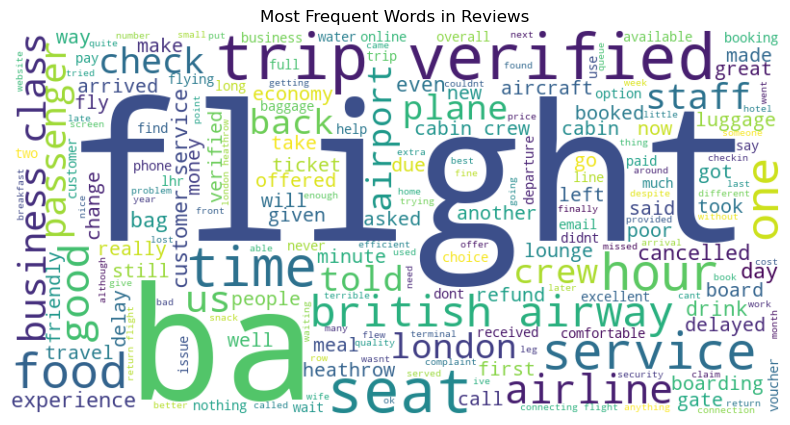

In [30]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all reviews into a single text
text = " ".join(df["Cleaned_Review"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Frequent Words in Reviews")


# Show the word cloud
plt.show()


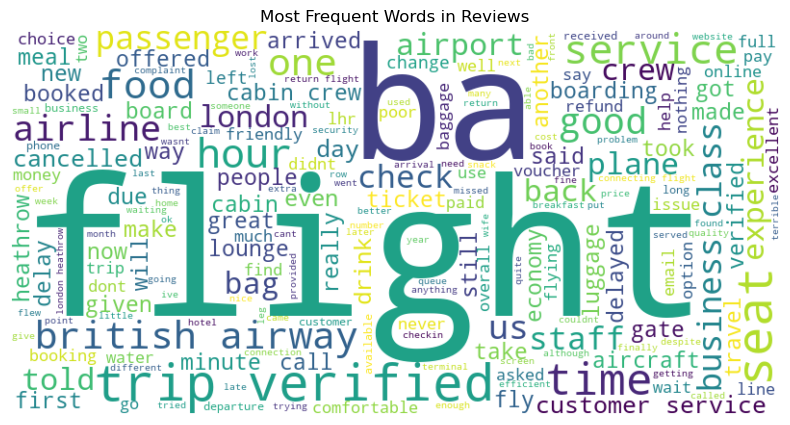

Word cloud saved at: C:\Users\HELLEN\Downloads\wordcloud.png


In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

# Get the absolute path of the Downloads folder
downloads_folder = os.path.join(os.path.expanduser("~"), "Downloads")

# Combine all reviews into a single text
text = " ".join(df["Cleaned_Review"])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Frequent Words in Reviews")

# Save the word cloud in the Downloads folder
wordcloud_path = os.path.join(downloads_folder, "wordcloud.png")
plt.savefig(wordcloud_path, dpi=300, bbox_inches="tight")

# Show the word cloud
plt.show()

# Print the saved file path for confirmation
print(f"Word cloud saved at: {wordcloud_path}")


In [18]:
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=set(["flight", "airline", "british"])).generate(text)
